In [ ]:
# I already do some preprocess techinque for model build,so i save that dataset and
# i did sentiment analysis (NLTK) of each reviews and store it an particular column(Sentiment)
# i load that Cleaned_reviews.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/cleaned_reviews.csv')
data.head()

,date,title,rating,helpful_votes,review_length,platform,language,location,version,verified_purchase,processed_reviews,sentiment,date_dt
0,2024-09-06,Claim who accept.,4,30,22,Flipkart,ar,Nepal,3.8.4,No,Every quite sense including six lot never effe...,Positive,2024-09-06
1,3/7/2025,Growth pretty wish.,4,120,22,Flipkart,ar,Guinea,5.2.6,Yes,Ask develop bag also worker pass. Expert white...,Negative,NaN
2,########,What then spend offer reason whom none.,5,130,21,Flipkart,es,Kuwait,3.6.5,No,customer address region try near risk next gir...,Positive,NaN
3,########,Say dog drug enter director strong student.,1,72,26,Amazon,pt,Uruguay,5.7.2,No,television loss election small detail red son ...,Positive,NaN
4,########,Purpose here beyond.,5,123,27,Amazon,zh,Mayotte,5.8.6,No,Pass share must amount lot per manage world ma...,Neutral,NaN


# **Let I Start My EDA Process**


# What is the overall sentiment of user reviews?
 Classify each review as Positive, Neutral, or Negative, and compute their proportions.

In [ ]:
sentiment_counts = data['sentiment'].value_counts()
sentiment_proportions = data['sentiment'].value_counts(normalize=True)
print("Sentiment Counts:")
print(sentiment_counts)
print("\nSentiment Percentages:")
print(sentiment_proportions*100)

Sentiment Counts:
sentiment
Positive    185
Negative     47
Neutral      18
Name: count, dtype: int64

Sentiment Percentages:
sentiment
Positive    74.0
Negative    18.8
Neutral      7.2
Name: proportion, dtype: float64


#How does sentiment vary by rating?
 Do 1-star reviews always contain negative sentiment? Is there any mismatch between ratings and actual text?

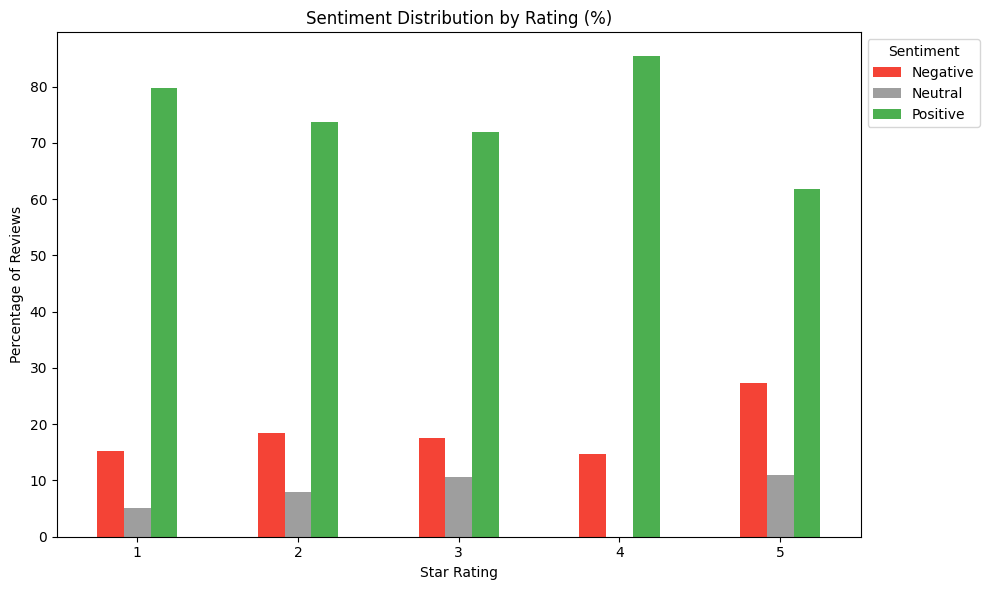

Number of 1-star reviews with Positive sentiment: 47


In [ ]:
rating_sentiment_pct = pd.crosstab(data['rating'], data['sentiment'], normalize='index') * 100
rating_sentiment_pct.plot(kind='bar', color=['#F44336', '#9E9E9E', '#4CAF50'], figsize=(10, 6))
plt.title('Sentiment Distribution by Rating (%)')
plt.xlabel('Star Rating')
plt.ylabel('Percentage of Reviews')
plt.legend(title='Sentiment', bbox_to_anchor=(1,1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Identify 1-star reviews with Positive sentiment
mismatch_1star = data[(data['rating'] == 1) & (data['sentiment'] == 'Positive')]
print(f"Number of 1-star reviews with Positive sentiment: {len(mismatch_1star)}")

#Which keywords or phrases are most associated with each sentiment class?
Use word clouds or keyword frequency tables per sentiment type.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Top keywords for Positive sentiment:
[('fact', 11), ('red', 10), ('interest', 10), ('decision', 10), ('across', 10), ('huge', 10), ('picture', 9), ('without', 9), ('window', 9), ('mind', 9)]

Top keywords for Negative sentiment:
[('forget', 5), ('attack', 5), ('trouble', 5), ('loss', 5), ('many', 5), ('also', 4), ('crime', 4), ('reflect', 4), ('argue', 4), ('personal', 4)]

Top keywords for Neutral sentiment:
[('short', 4), ('relationship', 4), ('must', 3), ('approach', 3), ('everyone', 3), ('woman', 3), ('time', 3), ('budget', 3), ('program', 3), ('result', 3)]


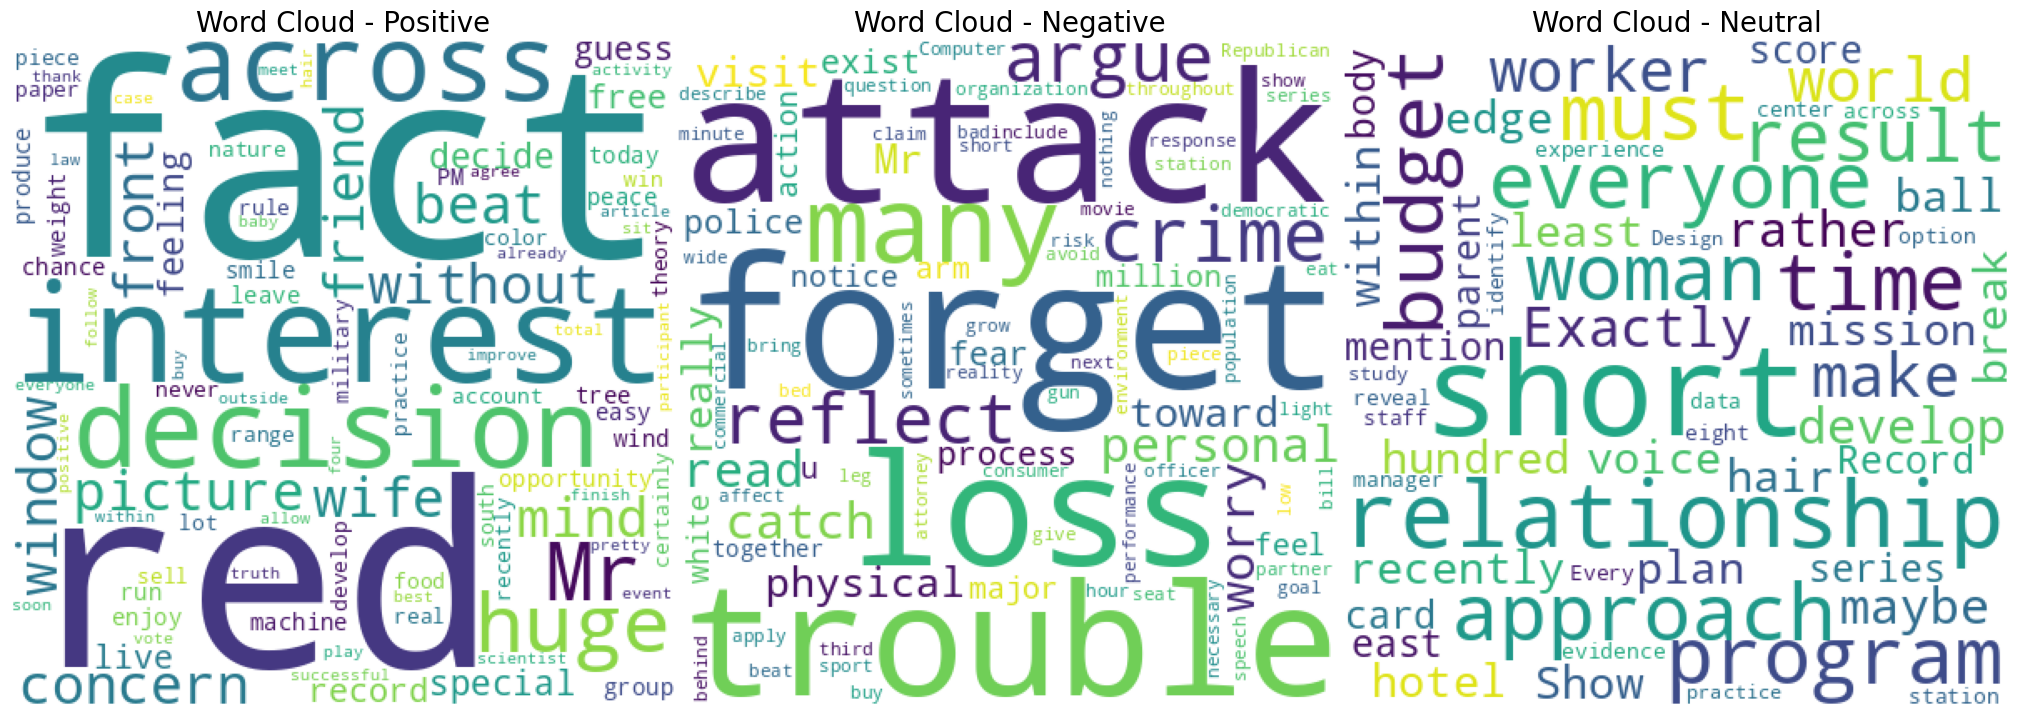

In [ ]:
from collections import Counter
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

def get_top_keywords(text_series, n=10):
    all_text = " ".join(text_series.astype(str)).lower()
    words = re.findall(r'\b\w+\b', all_text)

    filtered_words = [word for word in words if word not in stopwords and len(word) > 2]
    return Counter(filtered_words).most_common(n)

# Compute keyword frequencies for each sentiment
for sentiment in data['sentiment'].unique():
    subset = data[data['sentiment'] == sentiment]['processed_reviews']
    print(f"\nTop keywords for {sentiment} sentiment:")
    print(get_top_keywords(subset))

#Create Word Clouds
sentiments = data['sentiment'].unique()
fig, axes = plt.subplots(1, len(sentiments), figsize=(20, 10))

for i, sentiment in enumerate(sentiments):
    sentiment_text = " ".join(data[data['sentiment'] == sentiment]['processed_reviews'].astype(str))
    wordcloud = WordCloud(width=400, height=400, background_color='white',
                          min_font_size=10).generate(sentiment_text)

    axes[i].imshow(wordcloud)
    axes[i].set_title(f'Word Cloud - {sentiment}', fontsize=20)
    axes[i].axis("off")

plt.tight_layout(pad=0)
plt.show()

#How has sentiment changed over time?
 Analyze sentiment trends by month or week to spot peaks in satisfaction or dissatisfaction.

In [ ]:
data.replace('2024-08-06','6/8/2024' , inplace=True)
data.replace('2024-09-06','6/9/2024' , inplace=True)

In [ ]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['date'] = data['date'].fillna(data['date'].mode()[0])

In [ ]:
data['date'].value_counts()

,count
date,
2025-03-07,195
2025-06-07,2
2025-05-05,2
2024-08-06,2
2025-08-05,2
2025-07-09,2
2024-07-07,2
2025-01-05,2
2025-08-09,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               250 non-null    datetime64[ns]
 1   title              250 non-null    object        
 2   rating             250 non-null    int64         
 3   helpful_votes      250 non-null    int64         
 4   review_length      250 non-null    int64         
 5   platform           250 non-null    object        
 6   language           250 non-null    object        
 7   location           250 non-null    object        
 8   version            250 non-null    object        
 9   verified_purchase  250 non-null    object        
 10  processed_reviews  250 non-null    object        
 11  sentiment          250 non-null    object        
 12  date_dt            2 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 25.5+ KB


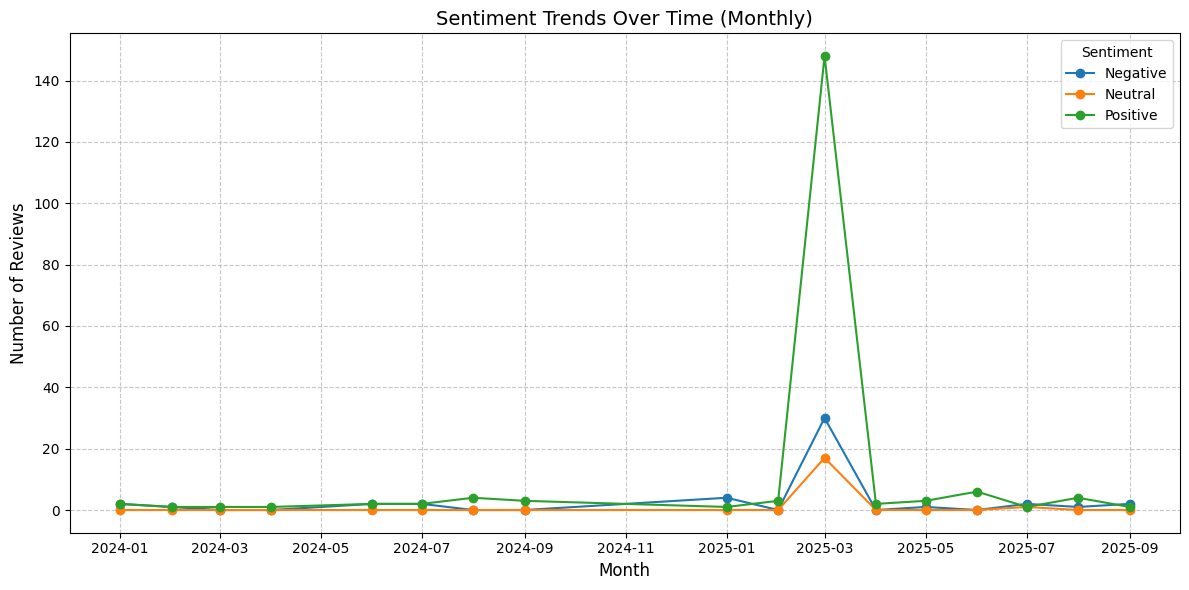

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data['month'] = data['date'].dt.to_period('M')
sentiment_trend = data.groupby(['month', 'sentiment']).size().unstack(fill_value=0)
sentiment_trend.index = sentiment_trend.index.to_timestamp()

plt.figure(figsize=(12, 6))

for column in sentiment_trend.columns:
    plt.plot(sentiment_trend.index, sentiment_trend[column], marker='o', label=column)

plt.title('Sentiment Trends Over Time (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.legend(title='Sentiment')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Do verified users tend to leave more positive or negative reviews?
Compare sentiment distribution between verified_purchase = Yes vs. No.

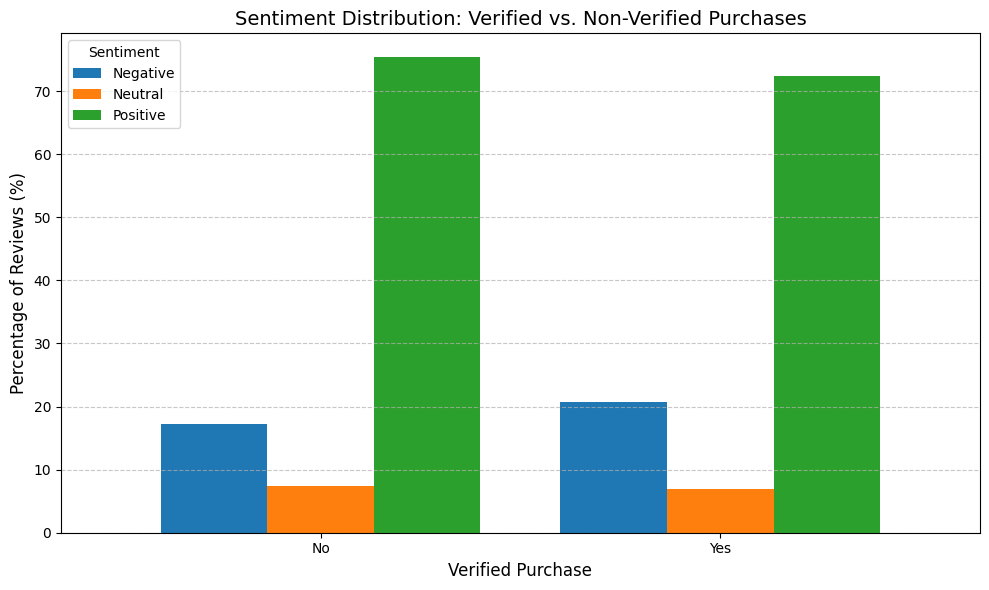

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

verified_sentiment = data.groupby(['verified_purchase', 'sentiment']).size().unstack(fill_value=0)
verified_sentiment_pct = verified_sentiment.div(verified_sentiment.sum(axis=1), axis=0) * 100

ax = verified_sentiment_pct.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Sentiment Distribution: Verified vs. Non-Verified Purchases', fontsize=14)
plt.xlabel('Verified Purchase', fontsize=12)
plt.ylabel('Percentage of Reviews (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Are longer reviews more likely to be negative or positive?
Compare average sentiment scores with review length.

/tmp/ipython-input-705017998.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length', data=data, palette='viridis')


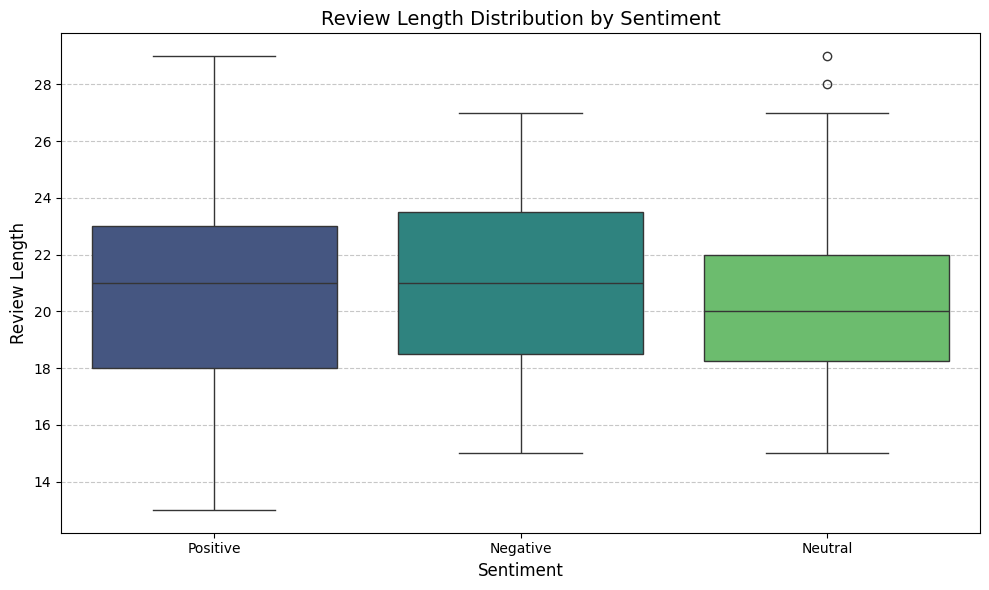

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='review_length', data=data, palette='viridis')
plt.title('Review Length Distribution by Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#Which locations show the most positive or negative sentiment?
Helps uncover region-based user experience issues or appreciation.

/tmp/ipython-input-2611012539.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive['Positive'], y=top_positive.index, ax=ax1, palette='Greens_r')
/tmp/ipython-input-2611012539.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_negative['Negative'], y=top_negative.index, ax=ax2, palette='Reds_r')


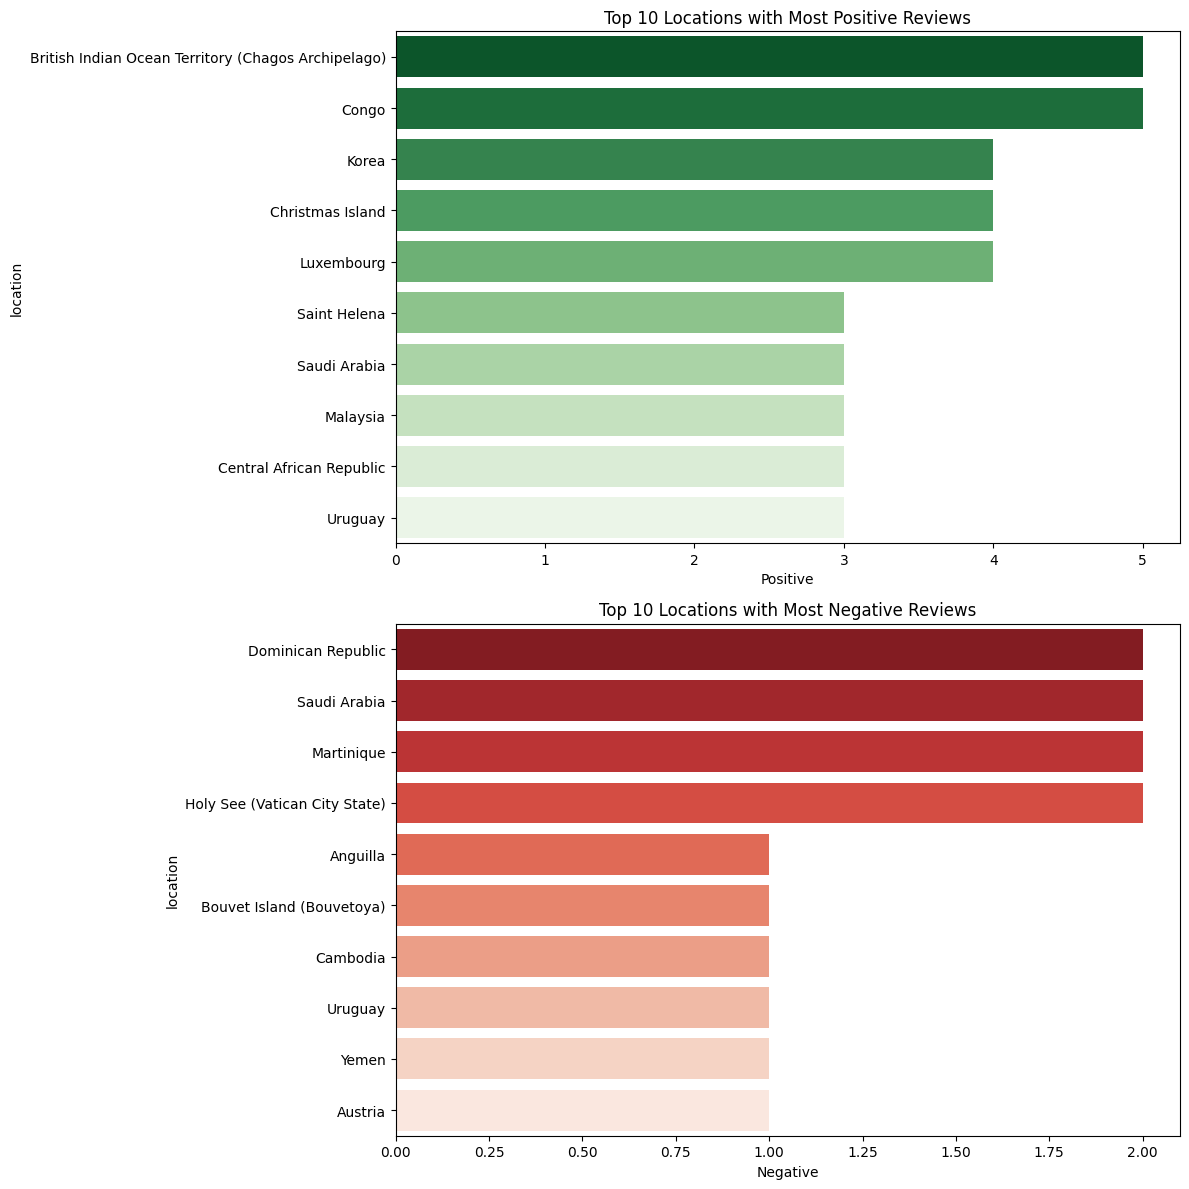

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

location_sentiment = data.groupby(['location', 'sentiment']).size().unstack(fill_value=0)
top_positive = location_sentiment.sort_values(by='Positive', ascending=False).head(10)
top_negative = location_sentiment.sort_values(by='Negative', ascending=False).head(10)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

sns.barplot(x=top_positive['Positive'], y=top_positive.index, ax=ax1, palette='Greens_r')
ax1.set_title('Top 10 Locations with Most Positive Reviews')

sns.barplot(x=top_negative['Negative'], y=top_negative.index, ax=ax2, palette='Reds_r')
ax2.set_title('Top 10 Locations with Most Negative Reviews')

plt.tight_layout()
plt.show()

#Is there a difference in sentiment across platforms (Web vs Mobile)?
Identify where the user experience might need improvement.

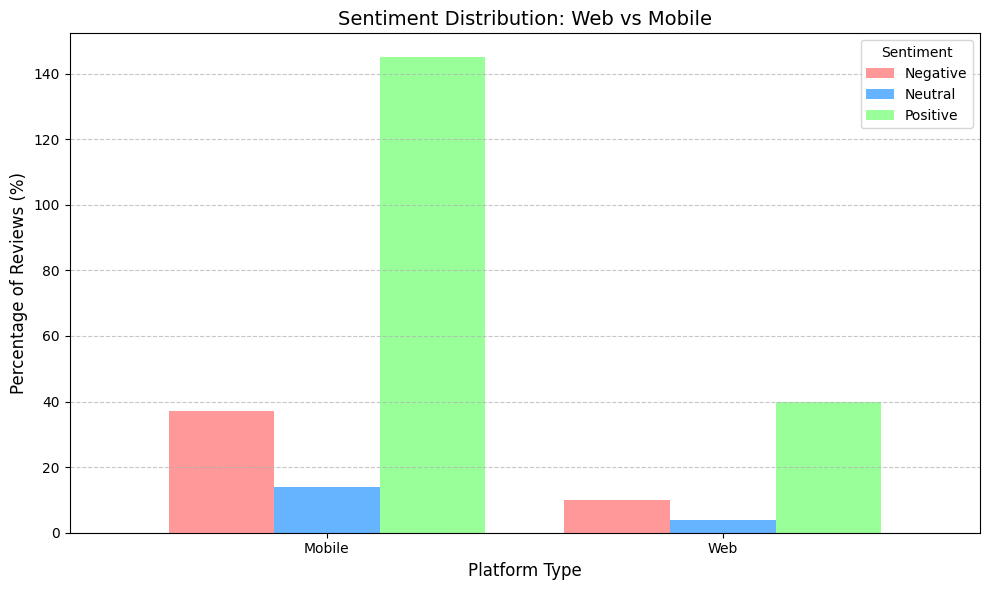

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

platform_sentiment = data.groupby(['platform_type', 'sentiment']).size().unstack(fill_value=0)
ax = platform_sentiment.plot(kind='bar', figsize=(10, 6), width=0.8, color=['#ff9999','#66b3ff','#99ff99'])

plt.title('Sentiment Distribution: Web vs Mobile', fontsize=14)
plt.xlabel('Platform Type', fontsize=12)
plt.ylabel('Percentage of Reviews (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#Which ChatGPT versions are associated with higher/lower sentiment?
Determine if a version release impacted user satisfaction.

/tmp/ipython-input-1605473882.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_versions.index, y=top_versions['pos_pct'], palette='viridis')


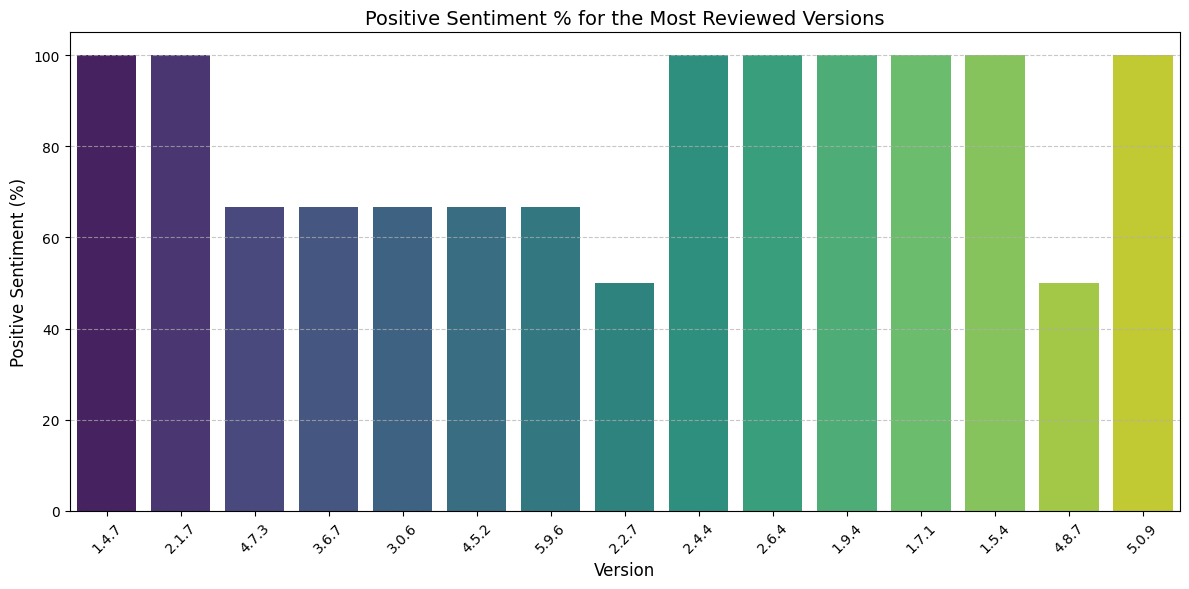

In [ ]:

version_sentiment = data.groupby(['version', 'sentiment']).size().unstack(fill_value=0)
version_sentiment['total'] = version_sentiment.sum(axis=1)
version_sentiment['pos_pct'] = (version_sentiment['Positive'] / version_sentiment['total']) * 100

top_versions = version_sentiment.sort_values(by='total', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_versions.index, y=top_versions['pos_pct'], palette='viridis')

plt.title('Positive Sentiment % for the Most Reviewed Versions', fontsize=14)
plt.xlabel('Version', fontsize=12)
plt.ylabel('Positive Sentiment (%)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#What are the most common negative feedback themes?
 Use topic modeling or keyword grouping to identify recurring pain points in negative reviews.

/tmp/ipython-input-2821943099.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.values, y=counts.index, palette='Reds_r')


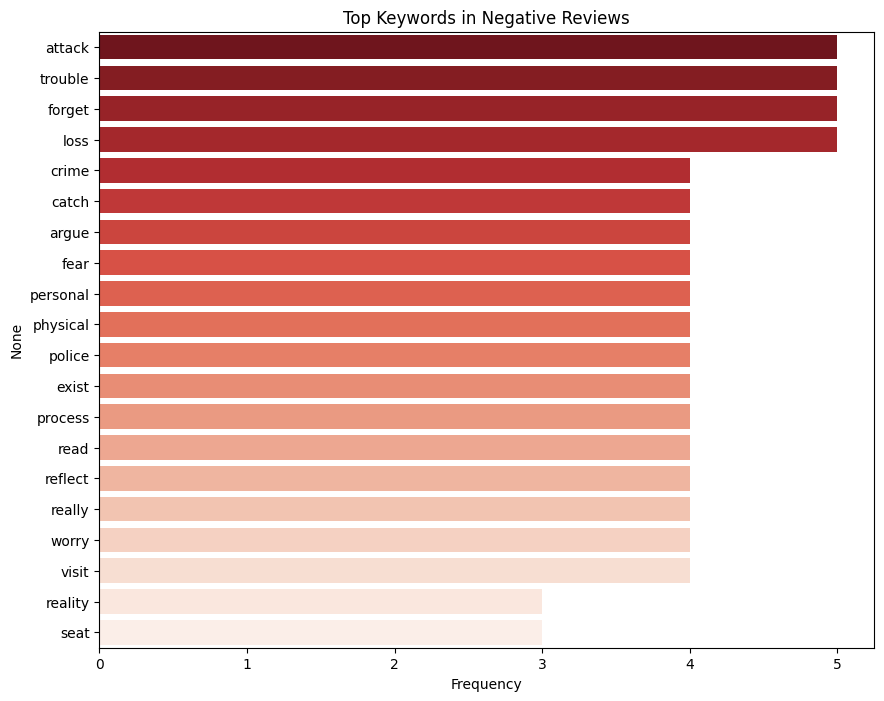

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS


negative_reviews = data[data['sentiment'] == 'Negative']['processed_reviews']

vec = CountVectorizer(stop_words='english', max_features=20)
matrix = vec.fit_transform(negative_reviews)
counts = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names_out()).sum().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=counts.values, y=counts.index, palette='Reds_r')
plt.title('Top Keywords in Negative Reviews')
plt.xlabel('Frequency')
plt.show()